# Problem 2


In [4]:
# Import libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import itertools

In [7]:
# Disable warnings
warnings.filterwarnings('ignore')

First of all, let's recreate the input graph $G$:

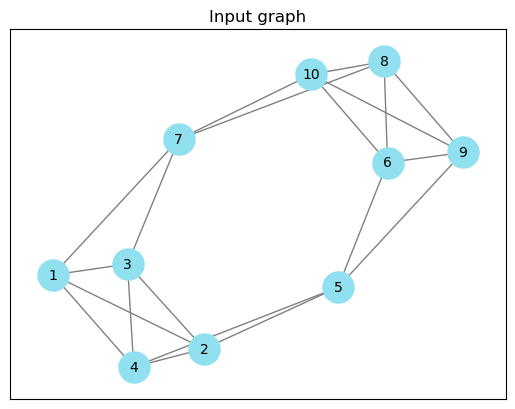

In [81]:
# Initializing G as an empty graph
G = nx.Graph()

# Defining V and E sets of nodes and edges
V = [i for i in range(1, 11)]

E = [(1, 2), (1, 3), (1, 4), (1, 7), (2, 3),
     (2, 4), (2, 5), (3, 4), (3, 7), (4, 5),
     (5, 6), (5, 9), (6, 8), (6, 9), (6, 10),
     (7, 8), (7, 10), (8, 9), (8, 10), (9, 10)]

# Populating the empty graph
G.add_nodes_from(V)
G.add_edges_from(E)

# Drawing the graph
pos = nx.spring_layout(G)
plt.title('Input graph')
nx.draw_networkx(G, pos, with_labels = True,
                 node_color = '#90e0ef', edge_color = 'gray',
                 node_size = 500, font_size = 10)
#plt.savefig('./images/input_graph.png')
plt.show()

It appears that it is a $d-regular$ graph, with $d = 4$. We can see it clearly from the degree matrix $D$ below.

In [17]:
# Representing the graph G
# - Adjacency matrix
# - Adjacency lists
# - Degree matrix
# - Laplacian matrix

A = nx.adjacency_matrix(G).toarray()

degrees = dict(G.degree)
D = np.diag([degrees[v] for v in V])

L = D - A

print("Adjaency matrix:\n", A, "\n")
print("Nodes degree:\n", degrees, "\n")
print("Degree matrix:\n", D, "\n")
print("Laplacian matrix:\n", L)

Adjaency matrix:
 [[0 1 1 1 0 0 1 0 0 0]
 [1 0 1 1 1 0 0 0 0 0]
 [1 1 0 1 0 0 1 0 0 0]
 [1 1 1 0 1 0 0 0 0 0]
 [0 1 0 1 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 1 1 1]
 [1 0 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 0 1 0 1]
 [0 0 0 0 0 1 1 1 1 0]] 

Nodes degree:
 {1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4} 

Degree matrix:
 [[4 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 4]] 

Laplacian matrix:
 [[ 4 -1 -1 -1  0  0 -1  0  0  0]
 [-1  4 -1 -1 -1  0  0  0  0  0]
 [-1 -1  4 -1  0  0 -1  0  0  0]
 [-1 -1 -1  4 -1  0  0  0  0  0]
 [ 0 -1  0 -1  4 -1  0  0 -1  0]
 [ 0  0  0  0 -1  4  0 -1 -1 -1]
 [-1  0 -1  0  0  0  4 -1  0 -1]
 [ 0  0  0  0  0 -1 -1  4 -1 -1]
 [ 0  0  0  0 -1 -1  0 -1  4 -1]
 [ 0  0  0  0  0 -1 -1 -1 -1  4]]


#### 1. Find the densest subgraph using the greedy algorithm we saw in class

Given an undirected graph $G = (V, E)$ and a subset of nodes $S \subseteq V$, it is possible to define the induced subgraph $G' = (S, E(S))$ where $E(S) \subseteq E = \{(u, v) \in E \, : \, u, v \in S\}$. Then, the density of $G'$ is defined as:

$$
F(G') = \frac{|E(S)|}{|S|}
$$

The densest subgraph problem consists in finding the subgraph of maximum density, i.e. solving  $\underset{S \subseteq V}{\operatorname{\argmax}}\, F(G')$.

The greedy algorithm we saw in class exploits the intuitive idea that the density can increase removing at each iteration the node with smallest degree.

In [15]:
# Define auxiliary function to compute density
def density(G: nx.Graph) -> float:
    n_edges = len(G.edges)
    n_nodes = len(G.nodes)   # same as len(G)
    if n_nodes == 0:         # handle possible division by 0
        return 0
    else:
        return n_edges / n_nodes

> The built-in NetworkX function `nx.density(G)` calculates density differently from how we defined it: for undirected graphs it returns $d = \frac{2m}{n(n - 1)}$, a value ranging from $0$ (empty graph) to $1$ (complete graph). So, in this exercise we prefer not to use it.

In [43]:
def greedy_densest_subgraph(G: nx.Graph) -> nx.Graph:

    '''
    Function that computed the densest subgraph using the greedy algorithm we saw in class.
    It takes a NetworkX Graph object as an input and returns the subgraph with higher density.
    The algorithm implements the simple idea of removing the node with smallest degree
    at each iteration. 
    '''
    # Initialize maximum density to input density
    f_max = density(G)

    S = G.copy()
    S_max = set(G.nodes())
    E_max = set(G.edges())

    #print(f_max)

    fig, axs = plt.subplots(2, 5, figsize = (20, 8))
    fig.suptitle('Greedy Densest Subgraph Iterations')
    iteration = 0

    while len(S.nodes) > 1:

        # Plot the current subgraph
        ax = axs[iteration // 5, iteration % 5]
        nx.draw(S, with_labels=True, node_color='#90e0ef', edge_color='gray', ax=ax)
        if iteration == 0: 
            ax.set_title(f"Iter {iteration + 1}\n\nDensity: {density(S):.4f}")
        else:
            ax.set_title(f"Iter {iteration + 1}\nNode removed: {min_degree_node}\nDensity: {density(S):.4f}")

        # Extract the node with the smallest degree
        #print("Nodes:", S.nodes)
        min_degree_node = min(S.degree, key = lambda x: x[1])[0]
        # print(dict(S.degree))
        
        # Remove the node with the smallest degree
        #print("Remove node:", min_degree_node)
        S.remove_node(min_degree_node) # removes node and all adjacent edges
        
        # Compute the new density
        current_density = density(S)
        #print(current_density)
        
        # If the new density is higher, update the maximum density and store subgraph
        if current_density > f_max:
            f_max = current_density
            S_max = set(S.nodes())
            E_max = set(S.edges())
        
        iteration += 1

     # Final iteration plot for the remaining single node
    if len(S.nodes) == 1:
        ax = axs[iteration // 5, iteration % 5]
        nx.draw(S, with_labels = True, node_color = '#90e0ef', edge_color = 'gray', ax = ax)
        ax.set_title(f"Iter {iteration + 1}\nNode removed: {min_degree_node}\nDensity: {density(S):.4f}")

    plt.tight_layout(rect = [0, 0.03, 1, 0.95])
    #plt.savefig("./images/densest_algorithm.png")
    plt.show()

    # Create the densest subgraph to return as output
    densest_subgraph = nx.Graph()
    densest_subgraph.add_nodes_from(S_max)
    densest_subgraph.add_edges_from(E_max)
    #print("\nDensest subgraph:", densest_subgraph.nodes)
    #print("Density:", f_max)

    return densest_subgraph

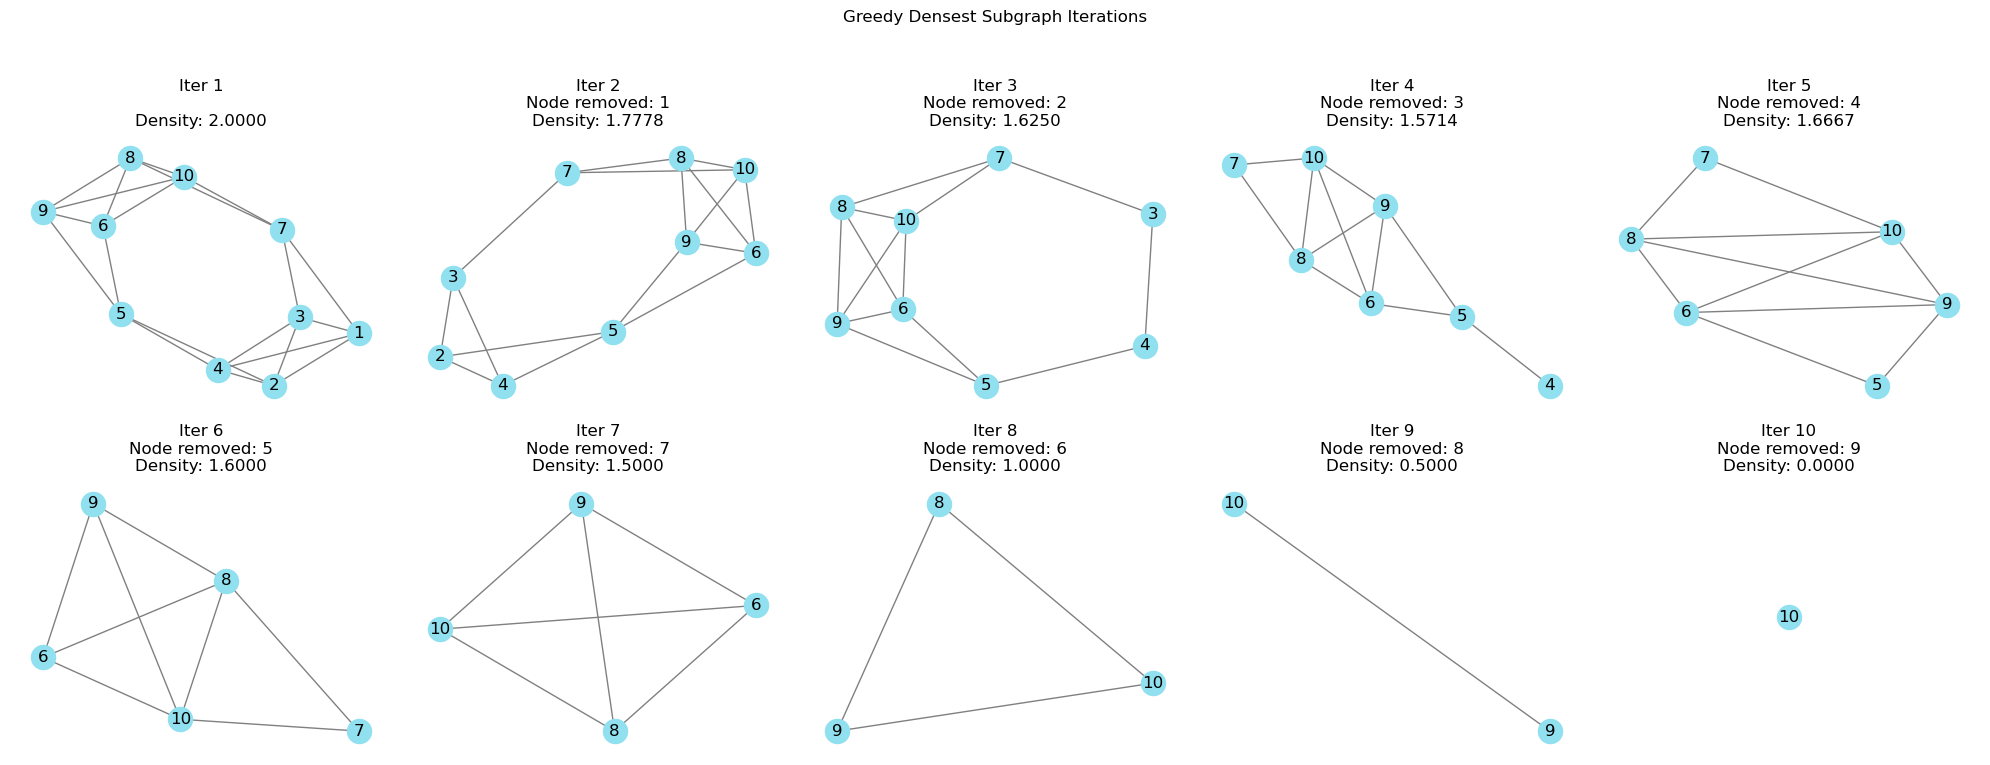

In [44]:
S = greedy_densest_subgraph(G)

In this case, the densest subgraph coincides with the initial one.

#### 2. Find a minimum cut.

Given a graph $G = (V, E)$ a $cut$ is defined as a partition of the nodes in two different sets $C_1,\; C_2$ such that $C_1 \cap C_2 = \emptyset$ and $C_1 \cup C_2 = V$. The $size$ of the cut $(C_1, C_2)$ is then defined as $|E(C_1, C_2)|$.

The $mincut$ problem is the problem of finding a cut $(C_1, C_2)$ that minimizes $|E(C_1, C_2)|$.

s-t cut
https://www.geeksforgeeks.org/minimum-cut-in-a-directed-graph/ 

Karger's algorithm
https://www.geeksforgeeks.org/introduction-and-implementation-of-kargers-algorithm-for-minimum-cut/



Minimum cut value: 4
Nodes in the source set of the minimum cut: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Nodes in the target set of the minimum cut: [10]


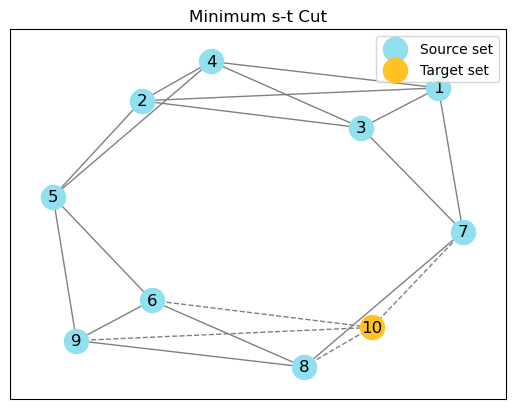

In [73]:
G1 = G.copy()

# Assign default capacity of 1 to each edge if not specified
for u, v in G1.edges():
    G1[u][v]['capacity'] = 1

# Define source and target nodes (you can choose any pair of nodes)
source, target = 1, 10

# Find the minimum cut
cut_value, partition = nx.minimum_cut(G1, source, target, capacity='capacity')
reachable, non_reachable = partition

print(f"Minimum cut value: {cut_value}")
print(f"Nodes in the source set of the minimum cut: {sorted(reachable)}")
print(f"Nodes in the target set of the minimum cut: {sorted(non_reachable)}")

# Identify cut edges
cut_edges = []
for u, v in G.edges():
    if (u in reachable and v in non_reachable) or (u in non_reachable and v in reachable):
        cut_edges.append((u, v))

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw the graph with source set and target set
nx.draw_networkx_nodes(G, pos, nodelist=reachable, node_color='#90e0ef', label="Source set")
nx.draw_networkx_nodes(G, pos, nodelist=non_reachable, node_color='#ffc222', label="Target set") # f7a072 ffb200
nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges() if edge not in cut_edges], edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, edge_color='gray', style='dashed')
# Add labels
nx.draw_networkx_labels(G, pos)
# Legend
plt.legend()

plt.title("Minimum s-t Cut")
#plt.savefig("./images/minimum_s-t_cut.png")
plt.show()

As a first option we used the built-in function `nx.minimum_cut` provided by NetworkX, that relies on the max-flow min-cut theorem, i.e., the capacity of a minimum capacity cut is equal to the flow value of a maximum flow. Having an undirected graph, we assume a capacity equal to $1$ for all nodes. For whatever source $s$ and target $t$, this algorithm will return a minimum cut that simply separes the target node from the rest of the graph. This makes sense, considering that every node in this particular graph has the same (minimum) degree equal to $4$ and therefore smallest number of edges that can disconnect the graph into two components is exactly $4$. And this happens regardless of the nodes that we choose as source and target. To find the overall minimum $s-t$ cut, we would need to consider every pair of vertices as source and target and run the algorithm to find the cut. Finally, we would return the minimum of all $s-t$ cuts. In this case, it's easy to see that all the minimum cuts have the same value, so they are all minimal.

In the general case, when the input graph isn't so peculiar as in our case, the best possible time complexity of this algorithm is $O(V^5)$, as there are $V^2$ possible pairs of nodes, the $s-t$ cut algorithm for one pair takes $O(V\cdot E)$ time and $E = O(V^2)$. 

Karger’s algorithm could be a better option.

#### 3. Demonstrate (by calculating $\lambda_2$, $\phi(G)$, etc.) that Cheeger’s inequalities hold for this graph.

In [110]:
# G is a d-regular graph with d = 4
d = 4

# Define normalized Laplacian matrix
# L = I - 1/d * A
# L = 
L_norm = np.eye(A.shape[0], A.shape[1]) - (1/d) * A
print("Normalized Laplacian:\n", L_norm, "\n")

# Check that is equal to built-in nx function
# N = D^(-1/2) * L * D^(-1/2)
N = nx.normalized_laplacian_matrix(G).toarray()
print((L_norm == N).all(), "\n")

Normalized Laplacian:
 [[ 1.   -0.25 -0.25 -0.25  0.    0.   -0.25  0.    0.    0.  ]
 [-0.25  1.   -0.25 -0.25 -0.25  0.    0.    0.    0.    0.  ]
 [-0.25 -0.25  1.   -0.25  0.    0.   -0.25  0.    0.    0.  ]
 [-0.25 -0.25 -0.25  1.   -0.25  0.    0.    0.    0.    0.  ]
 [ 0.   -0.25  0.   -0.25  1.   -0.25  0.    0.   -0.25  0.  ]
 [ 0.    0.    0.    0.   -0.25  1.    0.   -0.25 -0.25 -0.25]
 [-0.25  0.   -0.25  0.    0.    0.    1.   -0.25  0.   -0.25]
 [ 0.    0.    0.    0.    0.   -0.25 -0.25  1.   -0.25 -0.25]
 [ 0.    0.    0.    0.   -0.25 -0.25  0.   -0.25  1.   -0.25]
 [ 0.    0.    0.    0.    0.   -0.25 -0.25 -0.25 -0.25  1.  ]] 

True 



In [136]:
# Check that L_norm is symmetric
print("Is L_norm symmetric?\n", np.array_equal(L_norm, L_norm.transpose()), "\n")

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L_norm)

# Compute lambda2
lambda2 = np.sort(eigenvalues)[1]
print("Eigenvalues of L_norm:\n", eigenvalues, "\n")
print("Eigenvalue lambda2:", lambda2, "\n")

# Compute conductance

Is L_norm symmetric?
 True 

Eigenvalues of L_norm:
 [ 1.64038820e+00  1.25000000e+00 -1.10224270e-16  6.09611797e-01
  2.50000000e-01  1.25000000e+00  1.25000000e+00  1.25000000e+00
  1.25000000e+00  1.25000000e+00] 

Eigenvalue lambda2: 0.24999999999999986 



In [134]:
np.sort(eigenvalues)[1]

0.24999999999999986

In [121]:
eigenvectors

array([[ 2.78672705e-01, -8.06225775e-01,  3.16227766e-01,
        -2.17581073e-01,  3.53553391e-01, -1.02241056e-01,
         6.84733620e-02, -2.35665860e-02,  3.11376259e-02,
        -1.63620810e-02],
       [-2.78672705e-01,  1.24034735e-01,  3.16227766e-01,
         2.17581073e-01,  3.53553391e-01, -1.17724680e-01,
        -4.33857004e-01, -7.15674532e-01,  1.06657210e-01,
        -3.24371571e-01],
       [ 2.78672705e-01,  4.34121571e-01,  3.16227766e-01,
        -2.17581073e-01,  3.53553391e-01,  4.48386391e-01,
        -8.24287831e-02,  4.31994614e-01, -2.28075309e-01,
         2.00697428e-01],
       [-2.78672705e-01,  1.24034735e-01,  3.16227766e-01,
         2.17581073e-01,  3.53553391e-01,  1.75569464e-02,
         5.47607337e-01,  3.14402844e-01, -4.54196130e-01,
         2.32454001e-01],
       [ 4.35162146e-01,  1.24034735e-01,  3.16227766e-01,
         5.57345410e-01,  3.28261935e-16, -2.45977600e-01,
        -9.97949122e-02, -7.15634000e-03,  5.44476603e-01,
        -9.

In [90]:
a = np.matrix('1 2; 3 4')
b = np.matrix('5 6; 7 8')
a, b

(matrix([[1, 2],
         [3, 4]]),
 matrix([[5, 6],
         [7, 8]]))

In [95]:
a * 0.5

matrix([[0.5, 1. ],
        [1.5, 2. ]])

#### 4. Find the cut that satisfies Part 3 (and show that it does)